<a href="https://colab.research.google.com/github/sherko-abdullahi/callbacks-in-keras-and-tensorflow/blob/main/tensorboard_callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#requirements
import keras.datasets.mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np
from keras import models
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.callbacks import LambdaCallback
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
# for same results 
np.random.seed(23)

In [3]:
# dataset (saved in .keras/datasets)
path = 'mnist.npz'
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path)
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# log folder direction
logDir = ".\\logs\\mlp\\" + datetime.datetime.now().strftime("%Y%m%d - %H%M%S")
print("logDir:", logDir)
tensorboard_callback = TensorBoard(logDir)

logDir: .\logs\mlp\20210821 - 073610


In [5]:
# model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])                              
  
model.compile(optimizer='adam',
             
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
             )
history= model.fit(x_train, y_train,
          epochs= 30,
          validation_split= 0.2, 
          callbacks= [tensorboard_callback]
          )

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2935 - accuracy: 0.9129 - val_loss: 0.1427 - val_accuracy: 0.9573
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1483 - accuracy: 0.9550 - val_loss: 0.0952 - val_accuracy: 0.9732
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1171 - accuracy: 0.9637 - val_loss: 0.0897 - val_accuracy: 0.9733
Epoch 4/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0962 - accuracy: 0.9698 - val_loss: 0.0867 - val_accuracy: 0.9746
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0861 - accuracy: 0.9732 - val_loss: 0.0771 - val_accuracy: 0.9762
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0749 - accuracy: 0.9759 - val_loss: 0.0744 - val_accuracy: 0.9793
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0688 - accuracy: 0.9776 - val_loss: 0.0733 - val_accuracy:

In [6]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

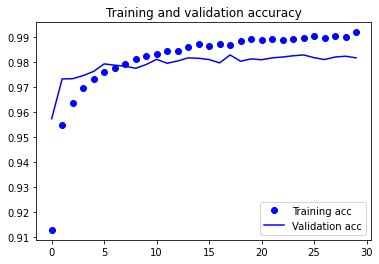

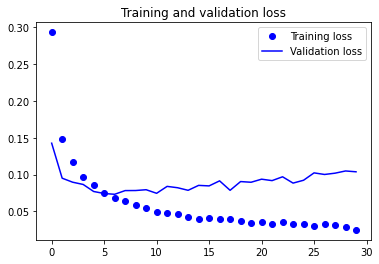

In [7]:
plot_history(history)